Importing Dependencies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

Loading the Dataset

In [5]:
df=pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
#checking the target column
pd.DataFrame(df["HeartDisease"].value_counts())

#1---> Cardiovascular Disease
#0---> Normal Heart Condition

,count
HeartDisease,
1,508
0,410


Checking for missing values in the Dataset

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Statistical information about the data

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Data Preprocessing

In [12]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [13]:
df["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [14]:
df["ST_Slope"].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])


Data Visualization

C:\Users\SUBHASISH NEOGI\AppData\Local\Temp\ipykernel_1888\2235430192.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HeartDisease'], bins=30)


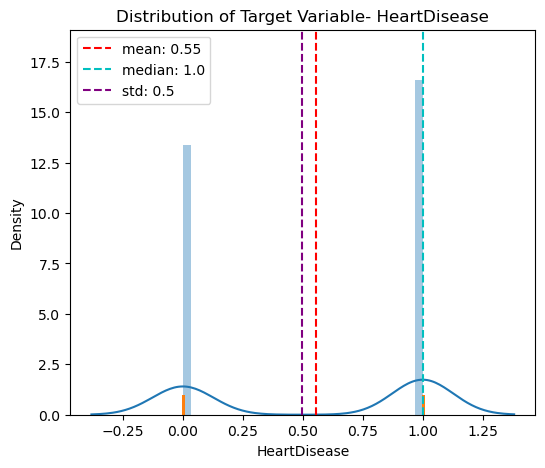

In [16]:
plt.figure(figsize=(6,5))

sns.distplot(df['HeartDisease'], bins=30)
sns.rugplot(df['HeartDisease'],height=0.05)

HeartDisease_mean = round(np.mean(df['HeartDisease']),2)
HeartDisease_median = round(np.median(df['HeartDisease']),2)
HeartDisease_std = round(np.std(df['HeartDisease']),2)


plt.axvline(x=np.mean(df['HeartDisease']), linestyle='--', color='r', label=f'mean: {HeartDisease_mean}')
plt.axvline(x=np.median(df['HeartDisease']), linestyle='--', color='c', label=f'median: {HeartDisease_median}')
plt.axvline(x=np.std(df['HeartDisease']), linestyle='--', color='purple', label=f'std: {HeartDisease_std}')

plt.title("Distribution of Target Variable- HeartDisease")
plt.legend()
plt.show()

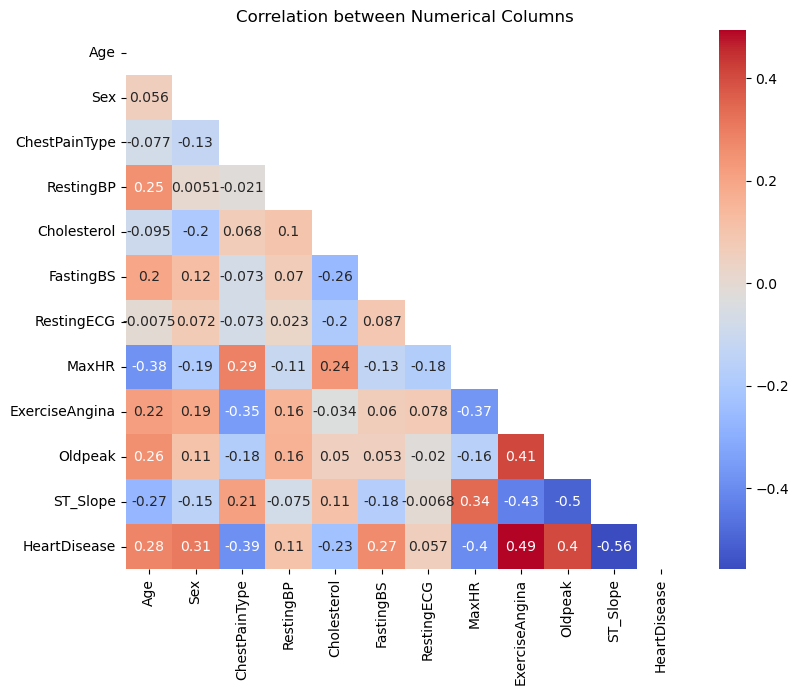

In [17]:
plt.figure(figsize=(9,7))

Corr_mat = df.corr()
mask=np.triu(np.ones_like(Corr_mat))
sns.heatmap(Corr_mat, annot=True, cmap='coolwarm',mask=mask)

plt.title("Correlation between Numerical Columns")
plt.tight_layout
plt.show()

Splitting the features and target from the dataset

In [18]:
X=df.drop(columns='HeartDisease',axis=1)
y=df['HeartDisease']

In [19]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [20]:
pd.DataFrame(y.head())

,HeartDisease
0,0
1,1
2,0
3,1
4,0


Splitting the dataset into Training data and Test data

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,stratify=y,random_state=10)

In [22]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(780, 11) (138, 11) (780,) (138,)


Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
#Hyperparameter Tuning for logistic regression model
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.5,1,2,5],'penalty':[None,'l1','l2'],
    'solver':['newton-cholesky','liblinear'],
    'class_weight':['balanced']}]

model=LogisticRegression()
clf=GridSearchCV(model,param_grid=parameters,cv=10,n_jobs=-1,scoring='accuracy')
clf.fit(X_train,y_train)
clf.cv_results_

c:\Users\SUBHASISH NEOGI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SUBHASISH NEOGI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SUBHASISH NEOGI\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SUBHASISH NEOGI\anaconda3\Lib\site-packages\sklearn\linear_model\_logis

{'mean_fit_time': array([0.03923914, 0.02033622, 0.00286384, 0.03882942, 0.02607753,
        0.00937469, 0.05596423, 0.02096903, 0.        , 0.05021141,
        0.04558148, 0.04320045, 0.02040524, 0.02990613, 0.0110255 ,
        0.03733196, 0.01101949, 0.02821777, 0.02356699, 0.01567051,
        0.00156221, 0.0486541 , 0.02724383, 0.01780875]),
 'std_fit_time': array([0.02357344, 0.04090528, 0.00575711, 0.04002357, 0.03860678,
        0.0076544 , 0.04852875, 0.03056327, 0.        , 0.04313158,
        0.0408749 , 0.03941481, 0.01993969, 0.04641062, 0.02800418,
        0.03326909, 0.00627731, 0.02506991, 0.03237326, 0.0237274 ,
        0.00468664, 0.04065784, 0.04248836, 0.02127038]),
 'mean_score_time': array([0.00382931, 0.        , 0.        , 0.01758478, 0.02504582,
        0.02129829, 0.00679247, 0.        , 0.        , 0.01566918,
        0.        , 0.01883626, 0.00975864, 0.        , 0.        ,
        0.02040031, 0.01188304, 0.0015626 , 0.02508965, 0.        ,
        0.      

In [25]:
clf.best_score_

0.832051282051282

In [26]:
#finding the best parameters for logistic regression model
clf.best_params_

{'C': 2,
 'class_weight': 'balanced',
 'penalty': 'l2',
 'solver': 'newton-cholesky'}

In [27]:
model=LogisticRegression(C=2,solver='newton-cholesky',penalty='l2',class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(C=2, class_weight='balanced', solver='newton-cholesky')

In [28]:
#determining the accuracy score of the model
from sklearn.metrics import accuracy_score
y_test_pred=model.predict(X_test)
accuracy=accuracy_score(y_test_pred,y_test)
accuracy

0.9057971014492754

Random Forest Classifier Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#Hyperparameter Tuning for Random Forest Classifier Model
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[100,200,500,1000],'max_depth':[1,2,5],
    'min_samples_split':[2,5],
    'class_weight':['balanced','balanced_subsample']}]

classifier=RandomForestClassifier()
clf=GridSearchCV(classifier,param_grid=parameters,cv=10,n_jobs=-1,scoring='accuracy')
clf.fit(X_train,y_train)
clf.cv_results_

c:\Users\SUBHASISH NEOGI\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'mean_fit_time': array([ 0.46893404,  1.26241183,  3.09679036,  6.82605531,  0.39137254,
         0.89841154,  3.05154488,  6.34457526,  0.48302662,  1.04988601,
         3.386761  ,  6.96398304,  0.43319809,  0.93728409,  3.50682001,
         6.88367815,  0.56658063,  1.14484446,  4.29286134,  9.67118168,
         0.69625773,  1.83890321,  4.8092448 ,  8.81906362,  0.74543357,
         1.97870498,  4.84524083,  9.75023329,  0.51870182,  1.73345854,
         5.25761702, 16.49978878,  1.75251682,  2.07215843,  5.44858348,
         9.89834936,  0.5416445 ,  1.43732862,  5.7046936 , 11.68639214,
         0.831621  ,  2.74428928, 10.05085592, 12.11567917,  0.63788111,
         1.69468675,  5.59633563, 10.42426369]),
 'std_fit_time': array([0.18782438, 0.70970287, 1.40228504, 2.66402463, 0.01023327,
        0.35171478, 1.37347457, 2.25836528, 0.21595258, 0.4597271 ,
        1.43033151, 2.5788586 , 0.03687183, 0.3599853 , 1.48428737,
        2.75519723, 0.1969473 , 0.45187598, 1.84406058, 2

In [46]:
clf.best_score_

0.8653846153846153

In [47]:
#finding the best parameters for random forest model
clf.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [48]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=5,class_weight='balanced',min_samples_split=5,max_features='sqrt')
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5)

In [49]:
#determining the accuracy score of the model
from sklearn.metrics import accuracy_score
y_test_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_test_pred,y_test)
accuracy

0.9130434782608695

Support Vector Classifier Model

In [35]:
from sklearn.svm import SVC

In [36]:
#Hyperparameter Tuning for Support Vector Machine
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.1,1,2],'kernel':['rbf','linear','sigmoid'],
    'gamma':[0.001,0.01,0.1]}]

classifier=SVC()
clf=GridSearchCV(classifier,param_grid=parameters,cv=10,n_jobs=-1,scoring='accuracy')
clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.12140551,  3.10373435,  0.07903047,  0.12586005,  3.01598659,
         0.14813747,  0.22539105,  2.99217246,  0.0483104 ,  0.0781239 ,
        25.01623144,  0.04830348,  0.08182755, 23.41124096,  0.14796538,
         0.32121401, 21.97619042,  0.1421155 ,  0.16983202, 38.63963592,
         0.04990802,  0.08469286, 42.40850513,  0.13532138,  0.34152462,
        39.42391522,  0.13836472]),
 'std_fit_time': array([5.16311660e-02, 1.12690312e+00, 4.57602854e-02, 7.60311325e-02,
        8.37763171e-01, 3.56474047e-02, 9.61047799e-02, 8.22724385e-01,
        3.58318274e-03, 2.83820333e-02, 7.66688453e+00, 4.08161536e-05,
        5.70405798e-03, 1.21342975e+01, 3.79259755e-02, 5.17385534e-02,
        1.18205495e+01, 3.45466327e-02, 3.31615121e-02, 1.77409381e+01,
        3.24096885e-03, 3.89658597e-03, 1.56161760e+01, 3.29415320e-02,
        3.15851391e-02, 1.27964381e+01, 2.94130772e-02]),
 'mean_score_time': array([0.08958936, 0.02921617, 0.01854808, 0.04483447, 0

In [37]:
clf.best_score_

0.8474358974358974

In [38]:
#finding the best parameters for support vector machine
clf.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [39]:
svm_classifier = SVC(C=1,gamma=0.001,kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear')

In [40]:
#determining the accuracy score of the model
from sklearn.metrics import accuracy_score
y_test_pred=svm_classifier.predict(X_test)
accuracy=accuracy_score(y_test_pred,y_test)
accuracy

0.9202898550724637

Accuracy Score on Support Vector Classifier Model

In [41]:
#thus our best model is support vector machine which has the highest accuracy
y_train_prediction=svm_classifier.predict(X_train)
y_train_accuracy=accuracy_score(y_train_prediction,y_train)
print("Training Accuracy: ",y_train_accuracy*100,"%")

Training Accuracy:  85.51282051282051 %


In [42]:
y_test_prediction=svm_classifier.predict(X_test)
y_test_accuracy=accuracy_score(y_test_prediction,y_test)
print("Test Accuracy: ",y_test_accuracy*100,"%")

Test Accuracy:  92.02898550724638 %
